In [1]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#importing dataset
df=pd.read_csv('C:\\Users\\Andriya Tiwary\\Downloads\\insurance.csv')
df.head(n=10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [2]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [3]:
df.shape

(1338, 7)

In [4]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Text(0.5, 1.0, 'Distribution of Charges')

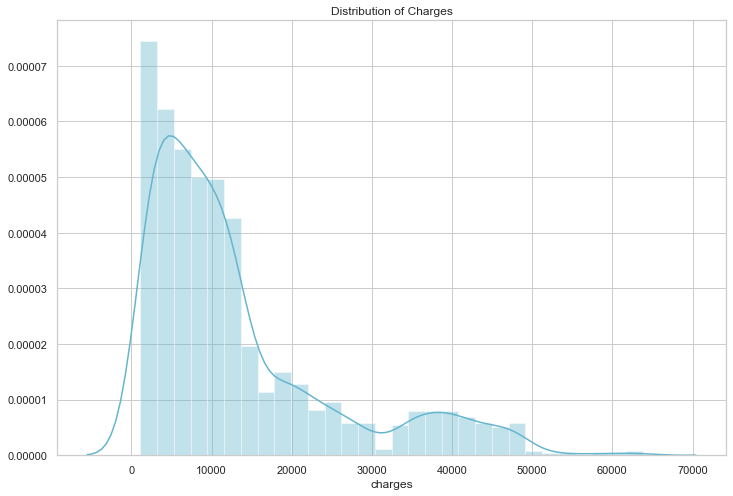

In [5]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(df['charges'], kde = True, color = 'c')
plt.title('Distribution of Charges')

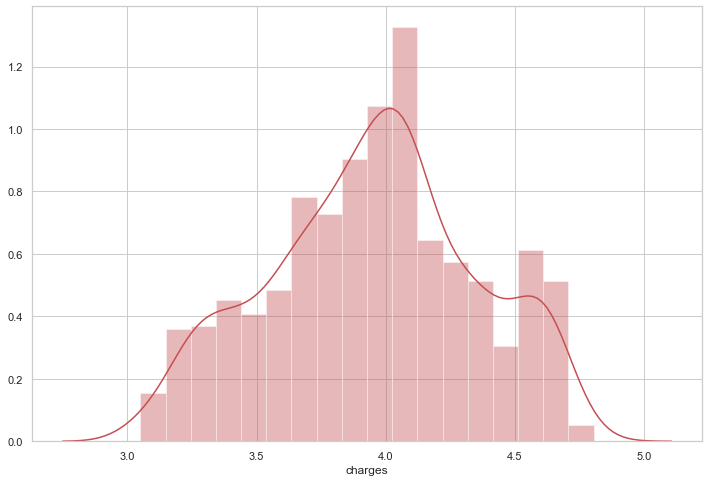

In [6]:
#This distribution is right-skewed. To make it closer to normal we can apply natural log

f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.distplot(np.log10(df['charges']), kde = True, color = 'r' )

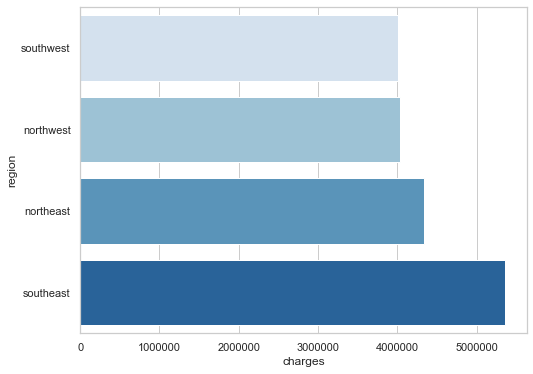

In [7]:
charges = df['charges'].groupby(df.region).sum().sort_values(ascending = True)
f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.barplot(charges.head(), charges.head().index, palette='Blues')

# So overall the highest medical charges are in the Southeast and the lowest are in the Southwest. 

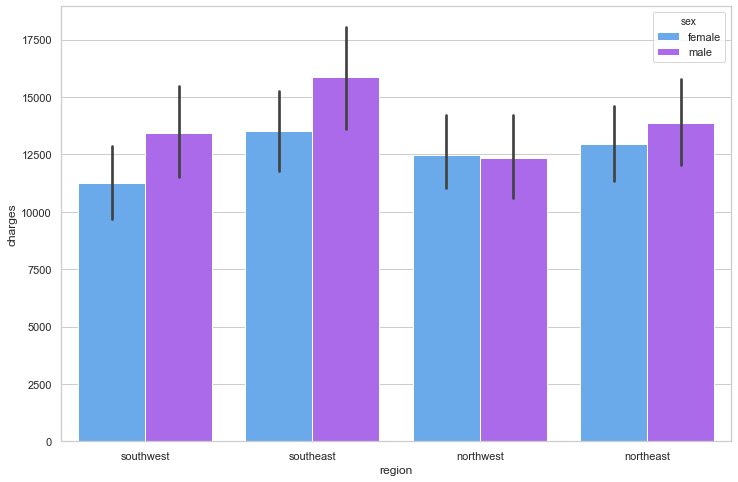

In [8]:
# Taking into account certain factors (sex, smoking, having children) let's see how it changes by region

f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='sex', data=df, palette='cool')

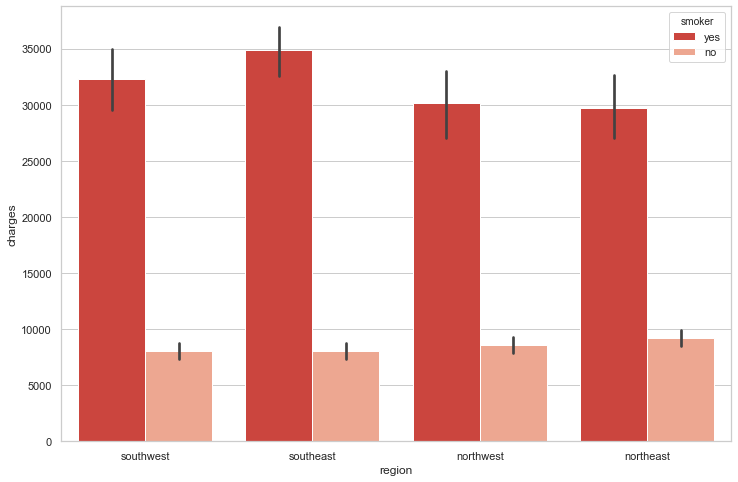

In [9]:
f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.barplot(x = 'region', y = 'charges',
                 hue='smoker', data=df, palette='Reds_r')

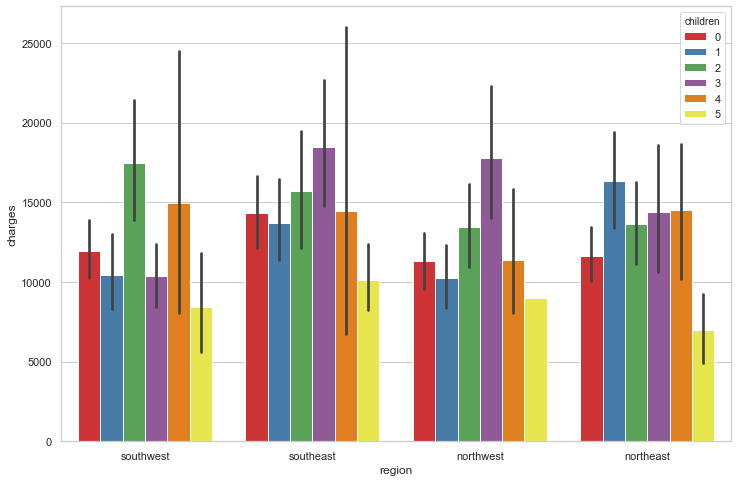

In [10]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='children', data=df, palette='Set1')

In [11]:
# we can see from these barplots the 
# highest charges due to smoking are still in the Southeast but the lowest are in the Northeast. 
# People in the Southwest generally smoke more than people in the Northeast, but 
# people in the Northeast have higher charges by gender than in the Southwest and Northwest overall. 
# And people with children tend to have higher medical costs overall as well

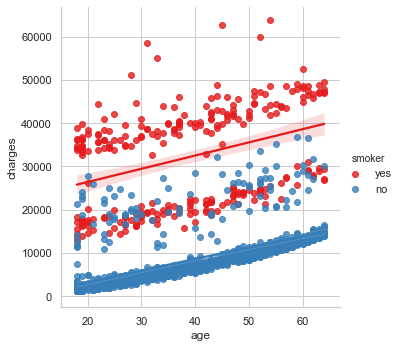

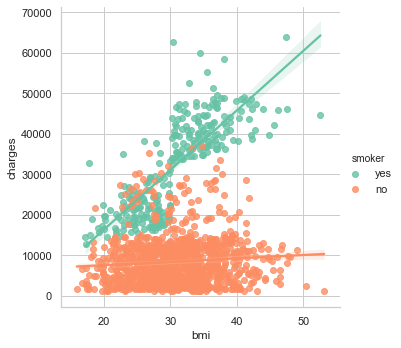

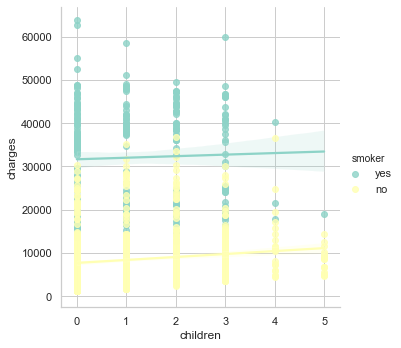

In [12]:
# analyzing the medical charges by age, bmi and children according to the smoking factor

ax = sns.lmplot(x = 'age', y = 'charges', data=df, hue='smoker', palette='Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='smoker', palette='Set2')
ax = sns.lmplot(x = 'children', y = 'charges', data=df, hue='smoker', palette='Set3')

In [13]:
# Smoking has the highest impact on medical costs, 
# even though the costs are growing with age, bmi and children.
# Also people who have children generally smoke less, which the following violinplots shows too

In [14]:
from sklearn.preprocessing import OneHotEncoder

# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')


enc_df = pd.DataFrame(enc.fit_transform(df[['sex']]).toarray())

# merge with main df on key values
df = df.join(enc_df)
df.head()

,age,sex,bmi,children,smoker,region,charges,0,1
0,19,female,27.900,0,yes,southwest,16884.92400,1.0,0.0
1,18,male,33.770,1,no,southeast,1725.55230,0.0,1.0
2,28,male,33.000,3,no,southeast,4449.46200,0.0,1.0
3,33,male,22.705,0,no,northwest,21984.47061,0.0,1.0
4,32,male,28.880,0,no,northwest,3866.85520,0.0,1.0


In [15]:
df.rename(columns = {0:'female',1:'male'}, inplace = True)
df.head()

,age,sex,bmi,children,smoker,region,charges,female,male
0,19,female,27.900,0,yes,southwest,16884.92400,1.0,0.0
1,18,male,33.770,1,no,southeast,1725.55230,0.0,1.0
2,28,male,33.000,3,no,southeast,4449.46200,0.0,1.0
3,33,male,22.705,0,no,northwest,21984.47061,0.0,1.0
4,32,male,28.880,0,no,northwest,3866.85520,0.0,1.0


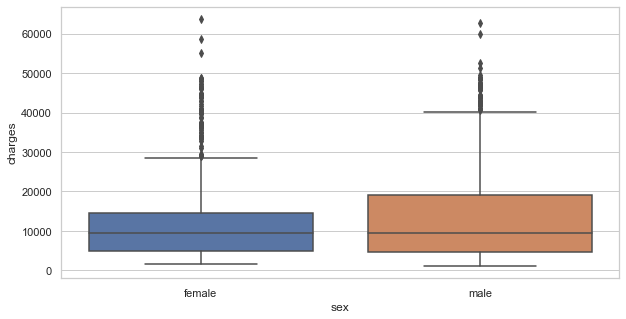

In [16]:
plt.figure(figsize=(10,5))
sns.boxplot(y='charges',x='sex',data=df.sort_values('charges',ascending=False))

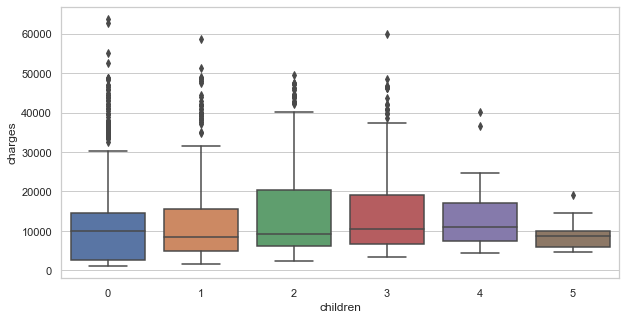

In [17]:
plt.figure(figsize=(10,5))
sns.boxplot(y='charges',x='children',data=df.sort_values('charges',ascending=False))

In [18]:
from sklearn.preprocessing import OneHotEncoder

# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')


enc_df = pd.DataFrame(enc.fit_transform(df[['smoker']]).toarray())

# merge with main df on key values
df = df.join(enc_df)
df.head()

,age,sex,bmi,children,smoker,region,charges,female,male,0,1
0,19,female,27.900,0,yes,southwest,16884.92400,1.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0.0,1.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0.0,1.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0.0,1.0,1.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0.0,1.0,1.0,0.0


In [19]:
df.rename(columns = {0:'non smoker',1:'smokes'}, inplace = True)
df.head()

,age,sex,bmi,children,smoker,region,charges,female,male,non smoker,smokes
0,19,female,27.900,0,yes,southwest,16884.92400,1.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0.0,1.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0.0,1.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0.0,1.0,1.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0.0,1.0,1.0,0.0


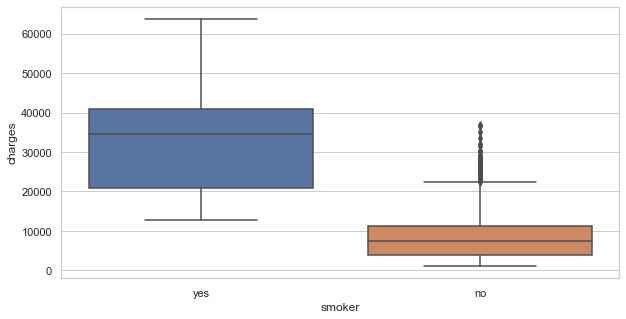

In [20]:
plt.figure(figsize=(10,5))
sns.boxplot(y='charges',x='smoker',data=df.sort_values('charges',ascending=False))

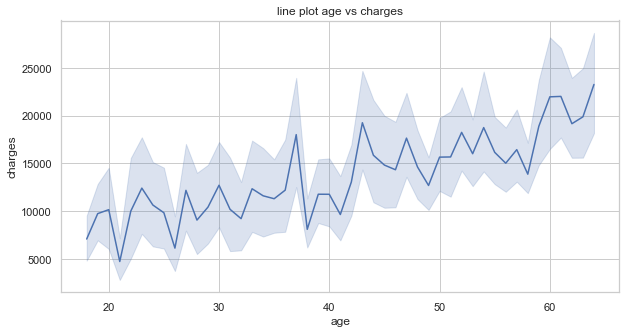

In [21]:
f = plt.figure(figsize=(10,5))
sns.lineplot(x=df['age'], y=df['charges'],)
plt.title('line plot age vs charges')
plt.show()

In [22]:
df.drop(['sex','smoker'],axis=1,inplace=True)
df.head()

,age,bmi,children,region,charges,female,male,non smoker,smokes
0,19,27.900,0,southwest,16884.92400,1.0,0.0,0.0,1.0
1,18,33.770,1,southeast,1725.55230,0.0,1.0,1.0,0.0
2,28,33.000,3,southeast,4449.46200,0.0,1.0,1.0,0.0
3,33,22.705,0,northwest,21984.47061,0.0,1.0,1.0,0.0
4,32,28.880,0,northwest,3866.85520,0.0,1.0,1.0,0.0


In [23]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

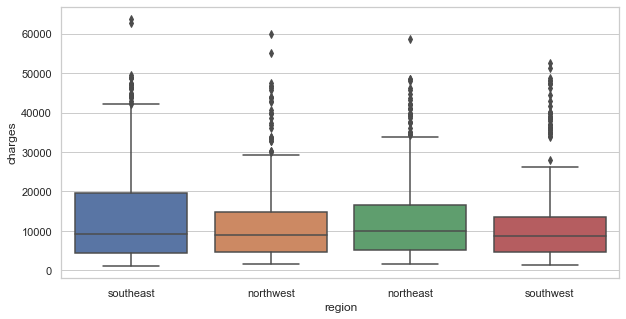

In [24]:
plt.figure(figsize=(10,5))
sns.boxplot(y='charges',x='region',data=df.sort_values('charges',ascending=False))

In [25]:
from sklearn.preprocessing import OneHotEncoder

# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')


enc_df = pd.DataFrame(enc.fit_transform(df[['region']]).toarray())

# merge with main df on key values
df = df.join(enc_df)
df.head()

,age,bmi,children,region,charges,female,male,non smoker,smokes,0,1,2,3
0,19,27.900,0,southwest,16884.92400,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,southeast,1725.55230,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,southeast,4449.46200,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,northwest,21984.47061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,northwest,3866.85520,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [26]:
df.rename(columns = {0:'northeast',1:'northwest',2:'southeast',3:'southwest'}, inplace = True)
df.head()

,age,bmi,children,region,charges,female,male,non smoker,smokes,northeast,northwest,southeast,southwest
0,19,27.900,0,southwest,16884.92400,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,southeast,1725.55230,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,southeast,4449.46200,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,northwest,21984.47061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,northwest,3866.85520,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [27]:
df.drop(['region'],axis=1,inplace=True)
df.head()

,age,bmi,children,charges,female,male,non smoker,smokes,northeast,northwest,southeast,southwest
0,19,27.900,0,16884.92400,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


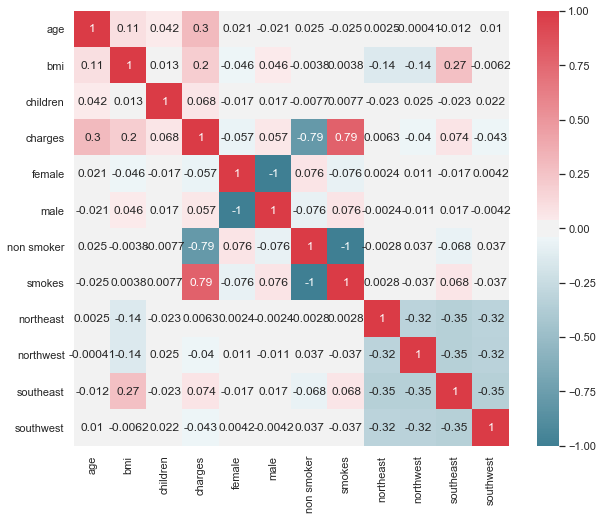

In [28]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot=True)

In [29]:
x = df.drop(['charges'], axis = 1)
y = df['charges']

In [30]:
# splitting into train test set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [31]:
#playing with multiple & then deciding the one with highest accuracy (r^2 score)

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [32]:
from sklearn import metrics

def predict(ml_model):
    model=ml_model.fit(x_train,y_train)
    print('Training score : {}'.format(model.score(x_train,y_train)))
    y_prediction=model.predict(x_test)
    print('predictions are: \n {}'.format(y_prediction))
    print('\n')
    r2_score=metrics.r2_score(y_test,y_prediction)
    print('r2 score: {}'.format(r2_score))
    print('MAE:',metrics.mean_absolute_error(y_test,y_prediction))
    print('MSE:',metrics.mean_squared_error(y_test,y_prediction))
    print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))

In [33]:
predict(RandomForestRegressor(random_state=0))            

Training score : 0.9733116995348552
predictions are: 
 [10172.5047973   8902.3258303  44537.2403543  12994.8339875
  9813.991372   11638.0206329   2541.72241057 12328.3213073
  7720.24022     6503.907555    8260.8953438  18102.9655161
  8431.6208173   6388.4400709  22920.4593298  13354.1863484
 13024.5992188  10452.4960255   6493.5072535  34097.75446
 24062.1267515  13201.8213332  10999.3724666  26940.7764839
  3181.5092643   9769.7930694   8986.4050006   8358.7660873
  3984.0924704  10746.1500769   7603.8446545  48595.2871856
 14111.5629955  10818.0358907  15444.1527939   4014.9831646
  8775.2147751  37670.8549974  40473.2857018   5731.0011768
  9738.1041551   3295.7518783  21064.6282259  47448.6534151
 36961.1874065   5923.7409378  13534.9438159   6733.6981975
  6372.785663   13423.1398879   4206.437118   14302.1792735
 28212.469809   47225.4814079  11815.373519    7952.3097747
  2965.3799202  12400.6161181  11058.0017437  18648.2441955
  1349.473791   47521.9180437  16540.1387488  1

In [34]:
predict(DecisionTreeRegressor())

Training score : 0.9982963931606103
predictions are: 
 [10065.413     8569.8618   44202.6536   13429.0354    9566.9909
 21984.47061   2196.4732   10848.1343    7151.092     4433.9159
  4766.022     8932.084     8823.279     4415.1588   35147.52848
 10381.4787   12124.9924   20277.80751   6455.86265  33907.548
 24667.419    12269.68865   9625.92     27533.9129    1391.5287
 20277.80751   2680.9493    7151.092     3757.8448    8116.26885
  7151.092    47896.79135  13393.756    10085.846    14283.4594
  3866.8552    8944.1151   37165.1638   39983.42595   1391.5287
 21984.47061   3866.8552   21659.9301   49577.6624   36219.40545
  3579.8287   10381.4787    6358.77645   4719.52405  11833.7823
  3046.062    24059.68019  27533.9129   44641.1974   11856.4115
  2689.4954    2497.0383    8932.084    18806.14547  14119.62
  1252.407    46130.5265   14001.1338    8968.33     26392.26029
  9875.6804   33907.548    55135.40209  11884.04858  15828.82173
 13451.122    11833.7823   17560.37975  13887.2

In [35]:
from sklearn.model_selection import RandomizedSearchCV

In [36]:
# Number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=6)]

# Number of features to consider at every split
max_features=['auto','sqrt']

# Maximum number of levels in tree
max_depth=[int(x) for x in np.linspace(5,30,num=4)]

# Minimum number of samples required to split a node
min_samples_split=[5,10,15,100]

In [37]:
# Create the random grid

random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
'max_depth':max_depth,
    'min_samples_split':min_samples_split
}

In [38]:
random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [39]:
# initialise your estimator
reg_rf=RandomForestRegressor(random_state=0)

In [40]:
# Random search of parameters, using 3 fold cross validation

rf_random=RandomizedSearchCV(estimator=reg_rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1,random_state=0)

In [41]:
rf_random.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    9.1s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [42]:
rf_random.best_params_

{'n_estimators': 320,
 'min_samples_split': 10,
 'max_features': 'auto',
 'max_depth': 5}

In [43]:
prediction=rf_random.predict(x_test)

In [44]:
metrics.r2_score(y_test,prediction)

0.8964242570893329

In [45]:
print('MAE',metrics.mean_absolute_error(y_test,prediction))
print('MSE',metrics.mean_squared_error(y_test,prediction))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE 2468.3608950777584
MSE 16482004.066860618
RMSE 4059.8034517523897


In [46]:
# Comparing the actual output values with the predicted values

df = pd.DataFrame({'Actual': y_test, 'Predicted': prediction})
df

,Actual,Predicted
578,9724.53000,12278.130026
610,8547.69130,10496.900023
569,45702.02235,44587.674955
1034,12950.07120,13948.038637
198,9644.25250,11126.275776
...,...,...
1084,15019.76005,16811.624803
726,6664.68595,7104.656999
1132,20709.02034,11943.830228
725,40932.42950,41074.196662


In [47]:
# feature scaling required for KNN & multiple linear regression

from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn import metrics

def predict(ml_model):
    model=ml_model.fit(x_train,y_train)
    print('Training score : {}'.format(model.score(x_train,y_train)))
    y_prediction=model.predict(x_test)
    print('predictions are: \n {}'.format(y_prediction))
    print('\n')
    r2_score=metrics.r2_score(y_test,y_prediction)
    print('r2 score: {}'.format(r2_score))
    print('MAE:',metrics.mean_absolute_error(y_test,y_prediction))
    print('MSE:',metrics.mean_squared_error(y_test,y_prediction))
    print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))

In [48]:
predict(LinearRegression())

Training score : 0.7369862590554375
predictions are: 
 [11225.63149107  9425.44491709 38209.44491709 16345.44491709
  6897.44491709  4049.44491709  1561.44491709 14353.44491709
  8977.44491709  7577.44491709  4457.44491709 10241.44491709
  8737.63149107  3729.44491709 27969.44491709 10641.44491709
 11385.44491709  6193.44491709  8313.44491709 27193.44491709
 33681.44491709 14321.44491709 11721.44491709 32025.44491709
  4217.44491709  9329.44491709  1065.44491709  9729.44491709
  3713.44491709 10505.44491709  8977.44491709 40081.44491709
 15753.63149107 13929.63149107 24689.44491709  5145.44491709
 12649.44491709 30769.63149107 33465.44491709  3617.63149107
  3961.44491709  4041.44491709 30569.44491709 39537.44491709
 27705.44491709  5057.44491709 10529.44491709  7913.44491709
  3561.44491709 10145.44491709  5689.44491709  3393.44491709
 33025.63149107 38385.44491709 15985.44491709  7249.44491709
  5785.44491709  9545.44491709  8953.44491709 11817.44491709
  1913.63149107 38945.44491709

In [49]:
predict(KNeighborsRegressor()) 

Training score : 0.8539319910618954
predictions are: 
 [ 8433.6044    7948.16022  46710.832484 11324.03448  11441.75795
  3668.90685   2588.9581   16939.455808  9434.74073  10491.92894
  7400.50176   9524.72236   7022.6268    7938.462988 20898.19424
 13872.595092 11924.81106   8511.04376   6432.93079  24222.130696
 28884.20109  16939.455808 10859.95526  32173.00028   1266.6699
  8005.89117   3804.76544  11568.516032  7938.462988  7215.45852
  9325.24962  47039.02148  13789.98448  12493.77308  16476.06643
  4068.41571  13133.93785  38864.234574 34013.86773   2170.4332
  7440.006568  2713.30858  22469.667024 43700.328524 33822.73938
  7949.665188 14870.366372  6309.95823  10760.698018 14292.213452
  2365.29542  11193.579358 28197.38424  37364.47891  12032.052
  6955.48292   1928.96732  13614.126392 12044.442648 16088.520654
  1701.371    39118.987594 12717.42816   7639.6508   12151.132154
 10090.384    24823.76414  37144.184024  3943.25764   9460.59523
 11848.5842   13375.022286 27883.96